# Linear Regression

This notebook provides a complete implementation of Linear Regression following the methodology from Chapter 4.

## Dataset Overview
- **Dataset**: House Prices Dataset (houses_data_eng.csv)
- **Dataset Path**: `Linear-Regression/houses_data_eng.csv`
- **Target Variable**: `new_price` (house price)
- **Features**: 
  - Numeric: `chambres` (bedrooms), `salles de bains` (bathrooms), `surface` (area in m²), `floor`
  - Binary: `ascenseur` (elevator), `terrasse` (terrace), `parking`
  - Categorical: `Type`, `City`, `Neighborhood` (neighborhood)
- **Total Samples**: 4675

## Notebook Structure
This notebook contains comprehensive steps covering:
1. Understanding the Linear Regression Model (theory)
2. Generate Sample Data (simple example)
3. Mathematical Solution - Normal Equation
4. Alternative Computational Methods (SVD, Pseudoinverse)
5. Make Predictions
6. Using Scikit-Learn Implementation
7. Evaluate Model Performance
8. Understanding Computational Complexity
9. Handling Edge Cases
10. Practical Implementation with Houses Dataset


## Step 1: Understanding the Linear Regression Model

### Model Formulation

Linear regression predicts a target value ŷ using:

- **Linear equation**: ŷ = θ₀ + θ₁x₁ + θ₂x₂ + ... + θₙxₙ
- **Vectorized form**: ŷ = hθ(x) = θ·x
- **Matrix form**: ŷ = Xθ (for multiple instances)

Where:
- θ₀ is the bias/intercept term
- θ₁ to θₙ are feature weights
- x₁ to xₙ are feature values
- x₀ = 1 (dummy feature for bias term)

### Cost Function

The Mean Squared Error (MSE) cost function:

**MSE(X, hθ) = (1/m) Σ(θᵀx⁽ⁱ⁾ - y⁽ⁱ⁾)²**

Where:
- m is the number of training instances
- x⁽ⁱ⁾ is the i-th instance's feature vector
- y⁽ⁱ⁾ is the i-th instance's target value

### Normal Equation

The closed-form solution to minimize MSE:

**θ̂ = (XᵀX)⁻¹ Xᵀy**

This equation directly computes the optimal parameters without iteration.


## Step 2: Generate Sample Data

Let's start with a simple example to understand linear regression basics.


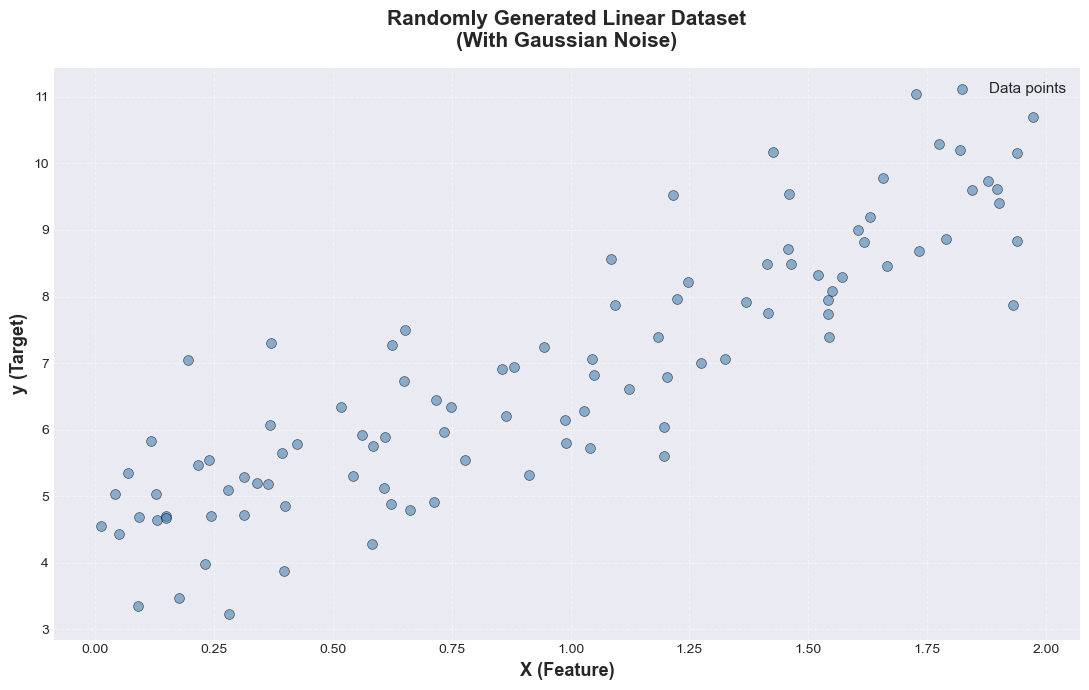


Dataset Summary:
Data shape: X = (100, 1), y = (100, 1)
X range: [0.01, 1.97]
y range: [3.24, 11.04]
True parameters: θ₀ = 4.0, θ₁ = 3.0 (with noise)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import add_dummy_feature
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid' if 'seaborn-v0_8-darkgrid' in plt.style.available else 'default')
sns.set_palette("husl")

# Set random seed for reproducibility
np.random.seed(42)

# Generate linear-looking data with noise
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # single feature, values between 0 and 2
y = 4 + 3 * X + np.random.randn(m, 1)  # y = 4 + 3x + Gaussian noise

# Visualize the data
plt.figure(figsize=(11, 7))
plt.scatter(X, y, c='steelblue', s=50, alpha=0.6, edgecolors='black', linewidth=0.5, label='Data points')
plt.xlabel("X (Feature)", fontsize=13, fontweight='bold')
plt.ylabel("y (Target)", fontsize=13, fontweight='bold')
plt.title("Randomly Generated Linear Dataset\n(With Gaussian Noise)", fontsize=15, fontweight='bold', pad=15)
plt.grid(True, alpha=0.4, linestyle='--')
plt.legend(fontsize=11, loc='best')
plt.tight_layout()
plt.show()

print(f"\n{'='*60}")
print("Dataset Summary:")
print(f"{'='*60}")
print(f"Data shape: X = {X.shape}, y = {y.shape}")
print(f"X range: [{X.min():.2f}, {X.max():.2f}]")
print(f"y range: [{y.min():.2f}, {y.max():.2f}]")
print(f"True parameters: θ₀ = 4.0, θ₁ = 3.0 (with noise)")
print(f"{'='*60}")


## Step 3: Mathematical Solution - Normal Equation

The Normal Equation provides a closed-form solution to find the optimal parameters.


In [2]:
# Method 1: Manual implementation using Normal Equation
# Add bias term (x0 = 1) to each instance
X_b = add_dummy_feature(X)  # Now X_b has shape (100, 2)

print(f"\n{'='*60}")
print("COMPUTING PARAMETERS USING NORMAL EQUATION")
print(f"{'='*60}")
print("  Formula: θ̂ = (XᵀX)⁻¹ Xᵀy")
print(f"  Steps:")
print(f"    1. Add bias term (X_b = [1, X])")
print(f"    2. Compute X_b.T @ X_b")
print(f"    3. Invert the matrix")
print(f"    4. Multiply by X_b.T @ y")
print(f"{'='*60}")

# Compute theta using Normal Equation: θ̂ = (XᵀX)⁻¹ Xᵀy
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

print(f"\n{'─'*60}")
print("Computed Parameters:")
print(f"{'─'*60}")
print(f"  θ₀ (bias/intercept):  {theta_best[0][0]:.4f}")
print(f"  θ₁ (feature weight):  {theta_best[1][0]:.4f}")
print(f"\n  Expected values:      θ₀ = 4.0, θ₁ = 3.0")
print(f"  Note: Noise in data prevents exact recovery of true parameters")
print(f"{'='*60}")



COMPUTING PARAMETERS USING NORMAL EQUATION
  Formula: θ̂ = (XᵀX)⁻¹ Xᵀy
  Steps:
    1. Add bias term (X_b = [1, X])
    2. Compute X_b.T @ X_b
    3. Invert the matrix
    4. Multiply by X_b.T @ y

────────────────────────────────────────────────────────────
Computed Parameters:
────────────────────────────────────────────────────────────
  θ₀ (bias/intercept):  4.2151
  θ₁ (feature weight):  2.7701

  Expected values:      θ₀ = 4.0, θ₁ = 3.0
  Note: Noise in data prevents exact recovery of true parameters


## Step 4: Alternative Computational Methods

Besides the Normal Equation, there are other methods to compute the optimal parameters.


In [3]:
print(f"\n{'='*60}")
print("ALTERNATIVE COMPUTATIONAL METHODS")
print(f"{'='*60}")
print("  Method 2: np.linalg.lstsq() - Uses SVD internally")
print("  Method 3: Pseudoinverse (Moore-Penrose) - More numerically stable")
print(f"{'='*60}")

# Method 2: Using np.linalg.lstsq() (least squares)
# This uses SVD (Singular Value Decomposition) internally
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
print(f"\n{'─'*60}")
print("Parameters from np.linalg.lstsq() (SVD method):")
print(f"{'─'*60}")
print(f"  θ₀: {theta_best_svd[0][0]:.4f}")
print(f"  θ₁: {theta_best_svd[1][0]:.4f}")

# Method 3: Using pseudoinverse (Moore-Penrose inverse)
theta_best_pinv = np.linalg.pinv(X_b) @ y
print(f"\n{'─'*60}")
print("Parameters from Pseudoinverse (Moore-Penrose):")
print(f"{'─'*60}")
print(f"  θ₀: {theta_best_pinv[0][0]:.4f}")
print(f"  θ₁: {theta_best_pinv[1][0]:.4f}")

print(f"\n{'─'*60}")
print("Method Comparison:")
print(f"{'─'*60}")
diff_svd = np.abs(theta_best - theta_best_svd).max()
diff_pinv = np.abs(theta_best - theta_best_pinv).max()
print(f"  Normal Eq vs SVD:      {diff_svd:.10f}")
print(f"  Normal Eq vs Pinv:     {diff_pinv:.10f}")
print(f"  ✓ All methods give identical results (within numerical precision)")
print(f"{'='*60}")



ALTERNATIVE COMPUTATIONAL METHODS
  Method 2: np.linalg.lstsq() - Uses SVD internally
  Method 3: Pseudoinverse (Moore-Penrose) - More numerically stable

────────────────────────────────────────────────────────────
Parameters from np.linalg.lstsq() (SVD method):
────────────────────────────────────────────────────────────
  θ₀: 4.2151
  θ₁: 2.7701

────────────────────────────────────────────────────────────
Parameters from Pseudoinverse (Moore-Penrose):
────────────────────────────────────────────────────────────
  θ₀: 4.2151
  θ₁: 2.7701

────────────────────────────────────────────────────────────
Method Comparison:
────────────────────────────────────────────────────────────
  Normal Eq vs SVD:      0.0000000000
  Normal Eq vs Pinv:     0.0000000000
  ✓ All methods give identical results (within numerical precision)


## Step 5: Make Predictions

Now let's use the computed parameters to make predictions on new data.



Predictions Using Normal Equation:
Predictions for X = [0 2]:
ŷ = [4.21509616 9.75532293]


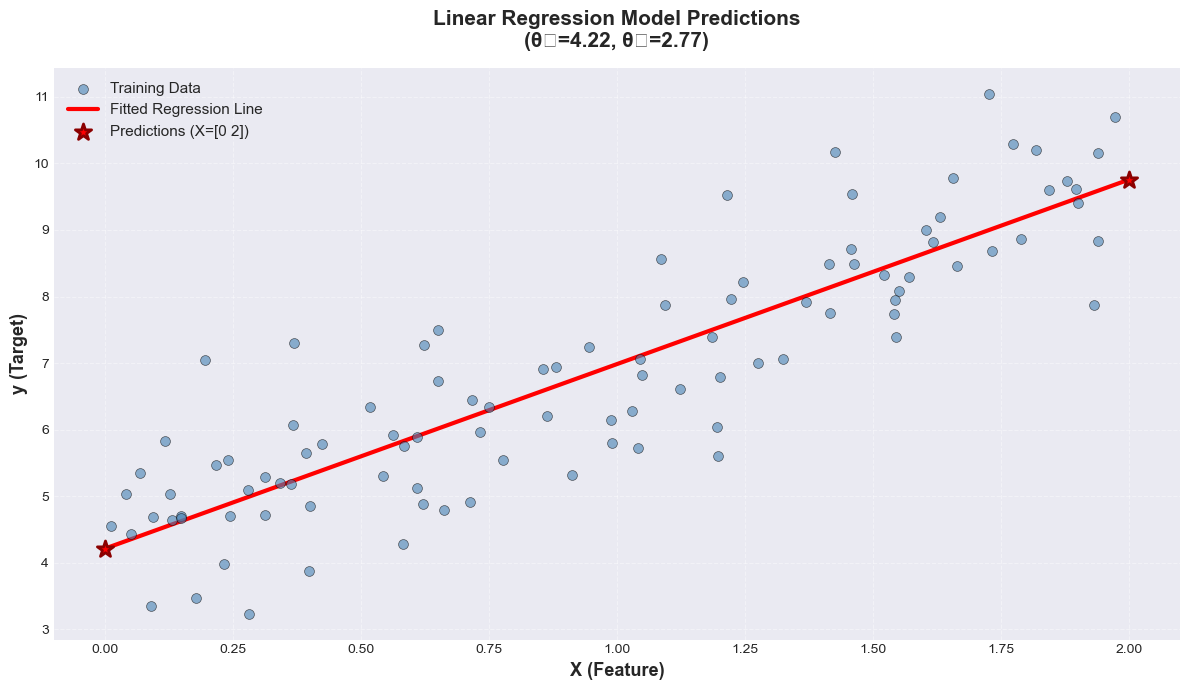

In [4]:
# Create new data points for prediction
X_new = np.array([[0], [2]])  # Predict for x=0 and x=2

# Add bias term to new data
X_new_b = add_dummy_feature(X_new)

# Make predictions using Normal Equation solution
y_predict = X_new_b @ theta_best

# Generate smooth line for visualization
X_line = np.linspace(0, 2, 100).reshape(-1, 1)
X_line_b = add_dummy_feature(X_line)
y_line = X_line_b @ theta_best

print(f"\n{'='*60}")
print("Predictions Using Normal Equation:")
print(f"{'='*60}")
print(f"Predictions for X = {X_new.ravel()}:")
print(f"ŷ = {y_predict.ravel()}")
print(f"{'='*60}")

# Visualize predictions with improved styling
plt.figure(figsize=(12, 7))
plt.scatter(X, y, c='steelblue', s=50, alpha=0.6, edgecolors='black', linewidth=0.5, 
            label='Training Data', zorder=3)
plt.plot(X_line, y_line, "r-", linewidth=3, label="Fitted Regression Line", zorder=2)
plt.scatter(X_new, y_predict, c='red', s=150, marker='*', edgecolors='darkred', 
            linewidth=2, label=f'Predictions (X={X_new.ravel()})', zorder=4)
plt.xlabel("X (Feature)", fontsize=13, fontweight='bold')
plt.ylabel("y (Target)", fontsize=13, fontweight='bold')
plt.title(f"Linear Regression Model Predictions\n(θ₀={theta_best[0][0]:.2f}, θ₁={theta_best[1][0]:.2f})", 
          fontsize=15, fontweight='bold', pad=15)
plt.legend(fontsize=11, loc='best', framealpha=0.9)
plt.grid(True, alpha=0.4, linestyle='--')
plt.tight_layout()
plt.show()


## Step 6: Using Scikit-Learn Implementation

Scikit-Learn provides a convenient and optimized implementation of linear regression.



Scikit-Learn LinearRegression Results:
Intercept (θ₀): 4.2151
Coefficient (θ₁): 2.7701

────────────────────────────────────────────────────────────
Comparison with Normal Equation:
────────────────────────────────────────────────────────────
Intercept difference: 0.0000000000
Coefficient difference: 0.0000000000
✓ Results are identical (within numerical precision)

Scikit-Learn predictions for X = [0 2]:
ŷ = [4.21509616 9.75532293]


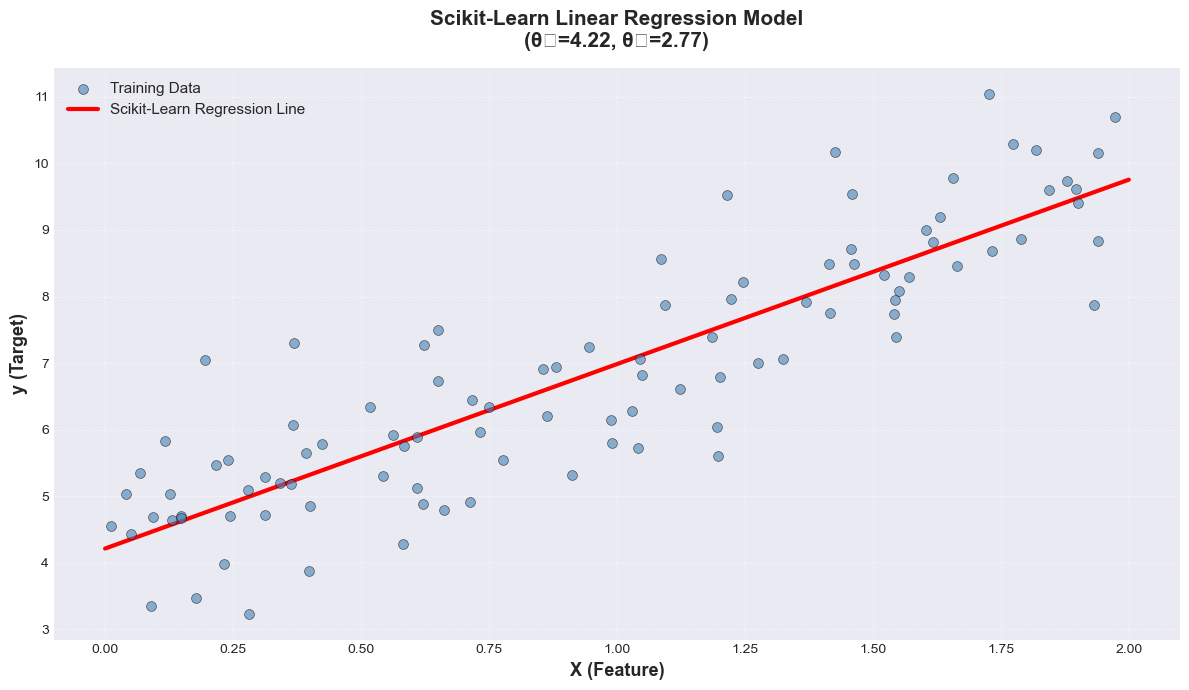

In [5]:
# Create and train linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f"\n{'='*60}")
print("Scikit-Learn LinearRegression Results:")
print(f"{'='*60}")
print(f"Intercept (θ₀): {lin_reg.intercept_[0]:.4f}")
print(f"Coefficient (θ₁): {lin_reg.coef_[0][0]:.4f}")

# Compare with Normal Equation
print(f"\n{'─'*60}")
print("Comparison with Normal Equation:")
print(f"{'─'*60}")
print(f"Intercept difference: {abs(lin_reg.intercept_[0] - theta_best[0][0]):.10f}")
print(f"Coefficient difference: {abs(lin_reg.coef_[0][0] - theta_best[1][0]):.10f}")
print(f"✓ Results are identical (within numerical precision)")
print(f"{'='*60}")

# Make predictions
y_pred_sklearn = lin_reg.predict(X_new)
print(f"\nScikit-Learn predictions for X = {X_new.ravel()}:")
print(f"ŷ = {y_pred_sklearn.ravel()}")

# Visualize Scikit-Learn predictions with improved styling
plt.figure(figsize=(12, 7))
X_line = np.linspace(0, 2, 100).reshape(-1, 1)
y_line = lin_reg.predict(X_line)
plt.scatter(X, y, c='steelblue', s=50, alpha=0.6, edgecolors='black', linewidth=0.5, 
            label='Training Data', zorder=3)
plt.plot(X_line, y_line, "r-", linewidth=3, label="Scikit-Learn Regression Line", zorder=2)
plt.xlabel("X (Feature)", fontsize=13, fontweight='bold')
plt.ylabel("y (Target)", fontsize=13, fontweight='bold')
plt.title(f"Scikit-Learn Linear Regression Model\n(θ₀={lin_reg.intercept_[0]:.2f}, θ₁={lin_reg.coef_[0][0]:.2f})", 
          fontsize=15, fontweight='bold', pad=15)
plt.legend(fontsize=11, loc='best', framealpha=0.9)
plt.grid(True, alpha=0.4, linestyle='--')
plt.tight_layout()
plt.show()


## Step 7: Evaluate Model Performance

Let's calculate performance metrics to assess how well our model fits the data.



Model Performance Metrics:
Mean Squared Error (MSE): 0.8066
Root Mean Squared Error (RMSE): 0.8981
R² Score: 0.7693 (coefficient of determination)

R² Score Interpretation:
────────────────────────────────────────────────────────────
  • R² = 1.0  → Perfect predictions
  • R² = 0.0  → Model predicts the mean
  • R² < 0.0  → Model is worse than predicting the mean

  Our model: R² = 0.7693 (76.9% of variance explained)


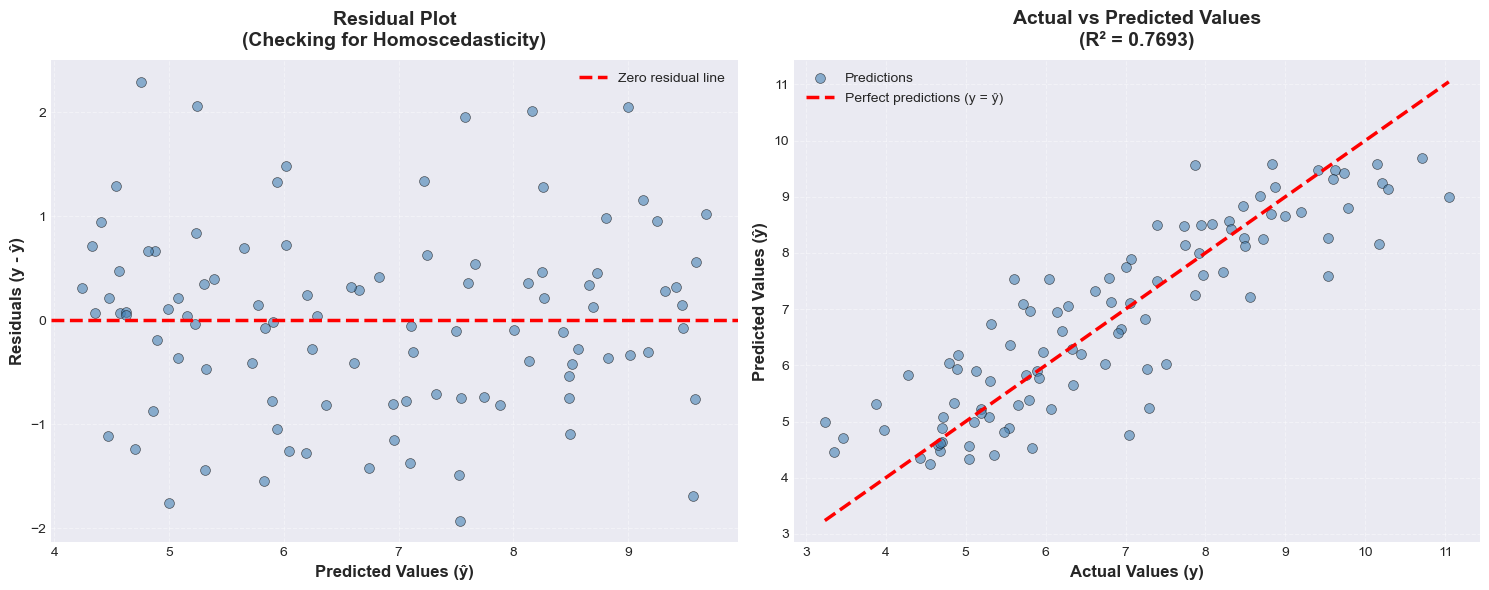

In [6]:
# Predict on training data
y_train_pred = lin_reg.predict(X)

# Calculate metrics
mse = mean_squared_error(y, y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_train_pred)

print(f"\n{'='*60}")
print("Model Performance Metrics:")
print(f"{'='*60}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f} (coefficient of determination)")
print(f"{'='*60}")
print(f"\nR² Score Interpretation:")
print(f"{'─'*60}")
print(f"  • R² = 1.0  → Perfect predictions")
print(f"  • R² = 0.0  → Model predicts the mean")
print(f"  • R² < 0.0  → Model is worse than predicting the mean")
print(f"\n  Our model: R² = {r2:.4f} ({r2*100:.1f}% of variance explained)")
print(f"{'='*60}")

# Visualize residuals with improved styling
residuals = y.ravel() - y_train_pred.ravel()
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Residual Plot
axes[0].scatter(y_train_pred, residuals, c='steelblue', s=50, alpha=0.6, 
                edgecolors='black', linewidth=0.5)
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=2.5, label='Zero residual line')
axes[0].set_xlabel("Predicted Values (ŷ)", fontsize=12, fontweight='bold')
axes[0].set_ylabel("Residuals (y - ŷ)", fontsize=12, fontweight='bold')
axes[0].set_title("Residual Plot\n(Checking for Homoscedasticity)", fontsize=14, fontweight='bold', pad=10)
axes[0].legend(fontsize=10, loc='best')
axes[0].grid(True, alpha=0.4, linestyle='--')

# Actual vs Predicted Plot
axes[1].scatter(y, y_train_pred, c='steelblue', s=50, alpha=0.6, 
                edgecolors='black', linewidth=0.5, label='Predictions')
min_val = min(y.min(), y_train_pred.min())
max_val = max(y.max(), y_train_pred.max())
axes[1].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2.5, 
             label='Perfect predictions (y = ŷ)')
axes[1].set_xlabel("Actual Values (y)", fontsize=12, fontweight='bold')
axes[1].set_ylabel("Predicted Values (ŷ)", fontsize=12, fontweight='bold')
axes[1].set_title(f"Actual vs Predicted Values\n(R² = {r2:.4f})", fontsize=14, fontweight='bold', pad=10)
axes[1].legend(fontsize=10, loc='best')
axes[1].grid(True, alpha=0.4, linestyle='--')

plt.tight_layout()
plt.show()


## Step 8: Understanding Computational Complexity

Let's demonstrate the computational complexity of different methods.


In [7]:
import time

def time_complexity_demo():
    """Demonstrate computational complexity of different methods"""
    
    n_features_list = [10, 100, 1000]
    m_instances = 10000
    
    print(f"\n{'='*70}")
    print("COMPUTATIONAL COMPLEXITY DEMONSTRATION")
    print(f"{'='*70}")
    print(f"  Number of instances (m): {m_instances:,}")
    print(f"  Number of features (n):  {n_features_list}")
    print(f"{'='*70}")
    
    results = []
    for n_features in n_features_list:
        # Generate random data
        X_large = np.random.randn(m_instances, n_features)
        y_large = np.random.randn(m_instances, 1)
        
        # Add bias term
        X_b_large = add_dummy_feature(X_large)
        
        # Time Normal Equation (O(n³))
        try:
            start = time.time()
            theta_ne = np.linalg.inv(X_b_large.T @ X_b_large) @ X_b_large.T @ y_large
            time_ne = time.time() - start
            ne_success = True
        except Exception as e:
            time_ne = None
            ne_success = False
        
        # Time Scikit-Learn (O(n²) using SVD)
        start = time.time()
        lin_reg_large = LinearRegression()
        lin_reg_large.fit(X_large, y_large)
        time_sklearn = time.time() - start
        
        results.append({
            'n_features': n_features,
            'ne_time': time_ne,
            'ne_success': ne_success,
            'sklearn_time': time_sklearn
        })
    
    print(f"\n{'─'*70}")
    print("Performance Results:")
    print(f"{'─'*70}")
    print(f"{'n_features':<12} {'Normal Equation':<20} {'Scikit-Learn':<20} {'Speedup':<15}")
    print(f"{'─'*70}")
    for r in results:
        ne_str = f"{r['ne_time']:.4f}s" if r['ne_success'] else "FAILED"
        speedup = f"{r['ne_time']/r['sklearn_time']:.2f}x" if r['ne_success'] and r['ne_time'] else "N/A"
        print(f"{r['n_features']:<12} {ne_str:<20} {r['sklearn_time']:.4f}s{'':<15} {speedup:<15}")
    
    print(f"\n{'─'*70}")
    print("Complexity Analysis:")
    print(f"{'─'*70}")
    print(f"  • Normal Equation:     O(n²) to O(n³) - can fail with singular matrices")
    print(f"  • Scikit-Learn (SVD):  O(n²) - more stable and handles edge cases")
    print(f"  • Both methods:        O(m) with respect to number of instances")
    print(f"  • Recommendation:      Use Scikit-Learn for production use")
    print(f"{'='*70}")

# Run demonstration
time_complexity_demo()



COMPUTATIONAL COMPLEXITY DEMONSTRATION
  Number of instances (m): 10,000
  Number of features (n):  [10, 100, 1000]

──────────────────────────────────────────────────────────────────────
Performance Results:
──────────────────────────────────────────────────────────────────────
n_features   Normal Equation      Scikit-Learn         Speedup        
──────────────────────────────────────────────────────────────────────
10           0.0122s              0.0199s                0.62x          
100          0.0084s              0.0350s                0.24x          
1000         0.2621s              0.7971s                0.33x          

──────────────────────────────────────────────────────────────────────
Complexity Analysis:
──────────────────────────────────────────────────────────────────────
  • Normal Equation:     O(n²) to O(n³) - can fail with singular matrices
  • Scikit-Learn (SVD):  O(n²) - more stable and handles edge cases
  • Both methods:        O(m) with respect to number

## Step 9: Handling Edge Cases

Let's explore how different methods handle edge cases like singular matrices and multicollinearity.


In [8]:
def handle_edge_cases():
    """Demonstrate handling of edge cases in linear regression"""
    
    print("Edge Cases Handling:")
    print("=" * 60)
    
    # Case 1: More features than samples (m < n)
    print("\n1. More features than samples (m=10, n=20):")
    X_edge = np.random.randn(10, 20)
    y_edge = np.random.randn(10, 1)
    
    try:
        # This will fail with Normal Equation
        X_b_edge = add_dummy_feature(X_edge)
        theta_edge = np.linalg.inv(X_b_edge.T @ X_b_edge) @ X_b_edge.T @ y_edge
        print("   Normal Equation succeeded (unexpected!)")
    except np.linalg.LinAlgError:
        print("   Normal Equation failed: XᵀX is singular (not invertible)")
    
    # Scikit-Learn handles this using SVD (pseudoinverse)
    try:
        lin_reg_edge = LinearRegression()
        lin_reg_edge.fit(X_edge, y_edge)
        print(f"   Scikit-Learn succeeded with {lin_reg_edge.coef_.shape[1]} features")
    except Exception as e:
        print(f"   Scikit-Learn failed: {e}")
    
    # Case 2: Perfectly correlated features (multicollinearity)
    print("\n2. Perfectly correlated features:")
    X_corr = np.random.randn(100, 2)
    X_corr[:, 1] = 2 * X_corr[:, 0]  # Perfect correlation
    y_corr = np.random.randn(100, 1)
    
    try:
        X_b_corr = add_dummy_feature(X_corr)
        theta_corr = np.linalg.inv(X_b_corr.T @ X_b_corr) @ X_b_corr.T @ y_corr
        print("   Normal Equation succeeded (unexpected!)")
    except np.linalg.LinAlgError:
        print("   Normal Equation failed: Singular matrix due to multicollinearity")
    
    # Scikit-Learn handles this using regularization or SVD
    try:
        lin_reg_corr = LinearRegression()
        lin_reg_corr.fit(X_corr, y_corr)
        print("   Scikit-Learn succeeded (uses pseudoinverse)")
        print(f"   Coefficients: {lin_reg_corr.coef_[0]}")
    except Exception as e:
        print(f"   Scikit-Learn failed: {e}")
        # Try Ridge regression as alternative
        from sklearn.linear_model import Ridge
        ridge_reg = Ridge(alpha=0.1)
        ridge_reg.fit(X_corr, y_corr)
        print("   Ridge regression (with regularization) succeeded")
    
    # Case 3: Single feature (should work for both)
    print("\n3. Single feature (normal case):")
    X_single = np.random.randn(100, 1)
    y_single = np.random.randn(100, 1)
    
    try:
        X_b_single = add_dummy_feature(X_single)
        theta_single = np.linalg.inv(X_b_single.T @ X_b_single) @ X_b_single.T @ y_single
        print("   Normal Equation succeeded")
    except:
        print("   Normal Equation failed")
    
    lin_reg_single = LinearRegression()
    lin_reg_single.fit(X_single, y_single)
    print("   Scikit-Learn succeeded")

handle_edge_cases()


Edge Cases Handling:

1. More features than samples (m=10, n=20):
   Normal Equation succeeded (unexpected!)
   Scikit-Learn succeeded with 20 features

2. Perfectly correlated features:
   Normal Equation succeeded (unexpected!)
   Scikit-Learn succeeded (uses pseudoinverse)
   Coefficients: [0.00685464 0.01370928]

3. Single feature (normal case):
   Normal Equation succeeded
   Scikit-Learn succeeded


In [9]:
# Load the houses dataset
df = pd.read_csv('Linear-Regression/houses_data_eng.csv')

print(f"\n{'='*70}")
print("HOUSE PRICES DATASET - OVERVIEW")
print(f"{'='*70}")
print(f"Dataset shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\n{'─'*70}")
print("Column Names:")
print(f"{'─'*70}")
for i, col in enumerate(df.columns.tolist(), 1):
    print(f"  {i:2d}. {col}")
print(f"\n{'─'*70}")
print("Data Types:")
print(f"{'─'*70}")
print(df.dtypes)
print(f"\n{'='*70}")
print("\nFirst 5 rows of the dataset:")
print(f"{'='*70}")
display(df.head())
print(f"\n{'='*70}")



HOUSE PRICES DATASET - OVERVIEW
Dataset shape: 4,675 rows × 15 columns

──────────────────────────────────────────────────────────────────────
Column Names:
──────────────────────────────────────────────────────────────────────
   1. Unnamed: 0.1
   2. Unnamed: 0
   3. new_price
   4. desc
   5. address
   6. chambres
   7. salles de bains
   8. surface
   9. ascenseur
  10. floor
  11. terrasse
  12. parking
  13. Type
  14. City
  15. Nighberd

──────────────────────────────────────────────────────────────────────
Data Types:
──────────────────────────────────────────────────────────────────────
Unnamed: 0.1        int64
Unnamed: 0          int64
new_price           int64
desc               object
address            object
chambres            int64
salles de bains     int64
surface             int64
ascenseur          object
floor               int64
terrasse           object
parking            object
Type               object
City               object
Nighberd           object
dtyp

,Unnamed: 0.1,Unnamed: 0,new_price,desc,address,chambres,salles de bains,surface,ascenseur,floor,terrasse,parking,Type,City,Nighberd
0,0,0,1000000,98 m² crossing apartment in the heart of the B...,Appartement à vendre Casablanca - Belvédère,2,1,98,Yes,5,Yes,No,Appartement,Casablanca,Belvédère
1,1,1,1750000,Office for sale of 173 m² in Casablanca - Your...,Bureau à vendre Casablanca - Autre,1,2,173,Yes,7,Yes,No,Bureau,Casablanca,Autre
2,2,2,2600000,"Discover your future home in Mandarona, Casabl...",Appartement à vendre Casablanca - Californie,3,2,150,Yes,3,Yes,Yes,Appartement,Casablanca,Californie
3,3,3,2290000,For Sale - Bright apartment of 130 m² fully re...,Appartement à vendre Casablanca - Les Hôpitaux,2,1,130,Yes,3,No,No,Appartement,Casablanca,Les Hôpitaux
4,4,4,1460000,Welcome to this charming apartment located in ...,Appartement à vendre Meknès - Hamria,3,2,163,Yes,2,No,No,Appartement,Meknès,Hamria


In [10]:
# Explore the dataset
print(f"\n{'='*70}")
print("DATASET STATISTICS AND EXPLORATION")
print(f"{'='*70}")

print(f"\n{'─'*70}")
print("Missing Values Check:")
print(f"{'─'*70}")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
missing_df = missing_df[missing_df['Missing Count'] > 0]
if len(missing_df) > 0:
    print(missing_df)
else:
    print("✓ No missing values found in the dataset!")

print(f"\n{'─'*70}")
print("Numeric Columns Summary:")
print(f"{'─'*70}")
numeric_cols = ['new_price', 'chambres', 'salles de bains', 'surface', 'floor']
display(df[numeric_cols].describe())

print(f"\n{'─'*70}")
print("Categorical Columns Distribution:")
print(f"{'─'*70}")
print(f"\nascenseur (elevator):")
print(df['ascenseur'].value_counts())
print(f"\nterrasse (terrace):")
print(df['terrasse'].value_counts())
print(f"\nparking:")
print(df['parking'].value_counts())
print(f"\nType:")
print(df['Type'].value_counts())
print(f"\n{'='*70}")



DATASET STATISTICS AND EXPLORATION

──────────────────────────────────────────────────────────────────────
Missing Values Check:
──────────────────────────────────────────────────────────────────────
✓ No missing values found in the dataset!

──────────────────────────────────────────────────────────────────────
Numeric Columns Summary:
──────────────────────────────────────────────────────────────────────


,new_price,chambres,salles de bains,surface,floor
count,4.675000e+03,4675.00000,4675.000000,4675.000000,4675.000000
mean,1.871291e+06,2.32000,1.680000,143.720000,3.200000
std,1.348472e+06,1.91269,0.835314,158.579131,1.385789
min,6.770260e+05,1.00000,1.000000,32.000000,1.000000
25%,1.000000e+06,1.00000,1.000000,50.000000,3.000000
50%,1.460000e+06,2.00000,1.000000,83.000000,3.000000
75%,1.794000e+06,3.00000,2.000000,150.000000,4.000000
max,6.800000e+06,10.00000,4.000000,720.000000,7.000000



──────────────────────────────────────────────────────────────────────
Categorical Columns Distribution:
──────────────────────────────────────────────────────────────────────

ascenseur (elevator):
ascenseur
Yes    4114
No      561
Name: count, dtype: int64

terrasse (terrace):
terrasse
No     2618
Yes    2057
Name: count, dtype: int64

parking:
parking
No     2992
Yes    1683
Name: count, dtype: int64

Type:
Type
Appartement    2244
Studio         1683
Villa           561
Bureau          187
Name: count, dtype: int64



In [11]:
# Prepare the data for modeling
print(f"\n{'='*70}")
print("DATA PREPARATION FOR MODELING")
print(f"{'='*70}")

# Select numeric features
numeric_features = ['chambres', 'salles de bains', 'surface', 'floor']
X_numeric = df[numeric_features].copy()

# Encode binary features (Yes/No to 1/0)
X_numeric['ascenseur'] = (df['ascenseur'] == 'Yes').astype(int)
X_numeric['terrasse'] = (df['terrasse'] == 'Yes').astype(int)
X_numeric['parking'] = (df['parking'] == 'Yes').astype(int)

# Target variable
y = df['new_price'].values.reshape(-1, 1)

print(f"\n{'─'*70}")
print("Feature Matrix Summary:")
print(f"{'─'*70}")
print(f"  • Shape: {X_numeric.shape[0]:,} samples × {X_numeric.shape[1]} features")
print(f"  • Features: {', '.join(X_numeric.columns.tolist())}")
print(f"\n{'─'*70}")
print("Features Statistics:")
print(f"{'─'*70}")
display(X_numeric.describe())

print(f"\n{'─'*70}")
print("Target Variable (Price) Statistics:")
print(f"{'─'*70}")
print(f"  • Minimum:    {y.min():>12,.2f} DH")
print(f"  • Maximum:    {y.max():>12,.2f} DH")
print(f"  • Mean:       {y.mean():>12,.2f} DH")
print(f"  • Median:     {np.median(y):>12,.2f} DH")
print(f"  • Std Dev:    {y.std():>12,.2f} DH")
print(f"  • Skewness:   {float(pd.Series(y.ravel()).skew()):>12.2f}")
print(f"{'='*70}")



DATA PREPARATION FOR MODELING

──────────────────────────────────────────────────────────────────────
Feature Matrix Summary:
──────────────────────────────────────────────────────────────────────
  • Shape: 4,675 samples × 7 features
  • Features: chambres, salles de bains, surface, floor, ascenseur, terrasse, parking

──────────────────────────────────────────────────────────────────────
Features Statistics:
──────────────────────────────────────────────────────────────────────


,chambres,salles de bains,surface,floor,ascenseur,terrasse,parking
count,4675.00000,4675.000000,4675.000000,4675.000000,4675.000000,4675.00000,4675.000000
mean,2.32000,1.680000,143.720000,3.200000,0.880000,0.44000,0.360000
std,1.91269,0.835314,158.579131,1.385789,0.324996,0.49644,0.480051
min,1.00000,1.000000,32.000000,1.000000,0.000000,0.00000,0.000000
25%,1.00000,1.000000,50.000000,3.000000,1.000000,0.00000,0.000000
50%,2.00000,1.000000,83.000000,3.000000,1.000000,0.00000,0.000000
75%,3.00000,2.000000,150.000000,4.000000,1.000000,1.00000,1.000000
max,10.00000,4.000000,720.000000,7.000000,1.000000,1.00000,1.000000



──────────────────────────────────────────────────────────────────────
Target Variable (Price) Statistics:
──────────────────────────────────────────────────────────────────────
  • Minimum:      677,026.00 DH
  • Maximum:    6,800,000.00 DH
  • Mean:       1,871,291.04 DH
  • Median:     1,460,000.00 DH
  • Std Dev:    1,348,327.84 DH
  • Skewness:           2.18


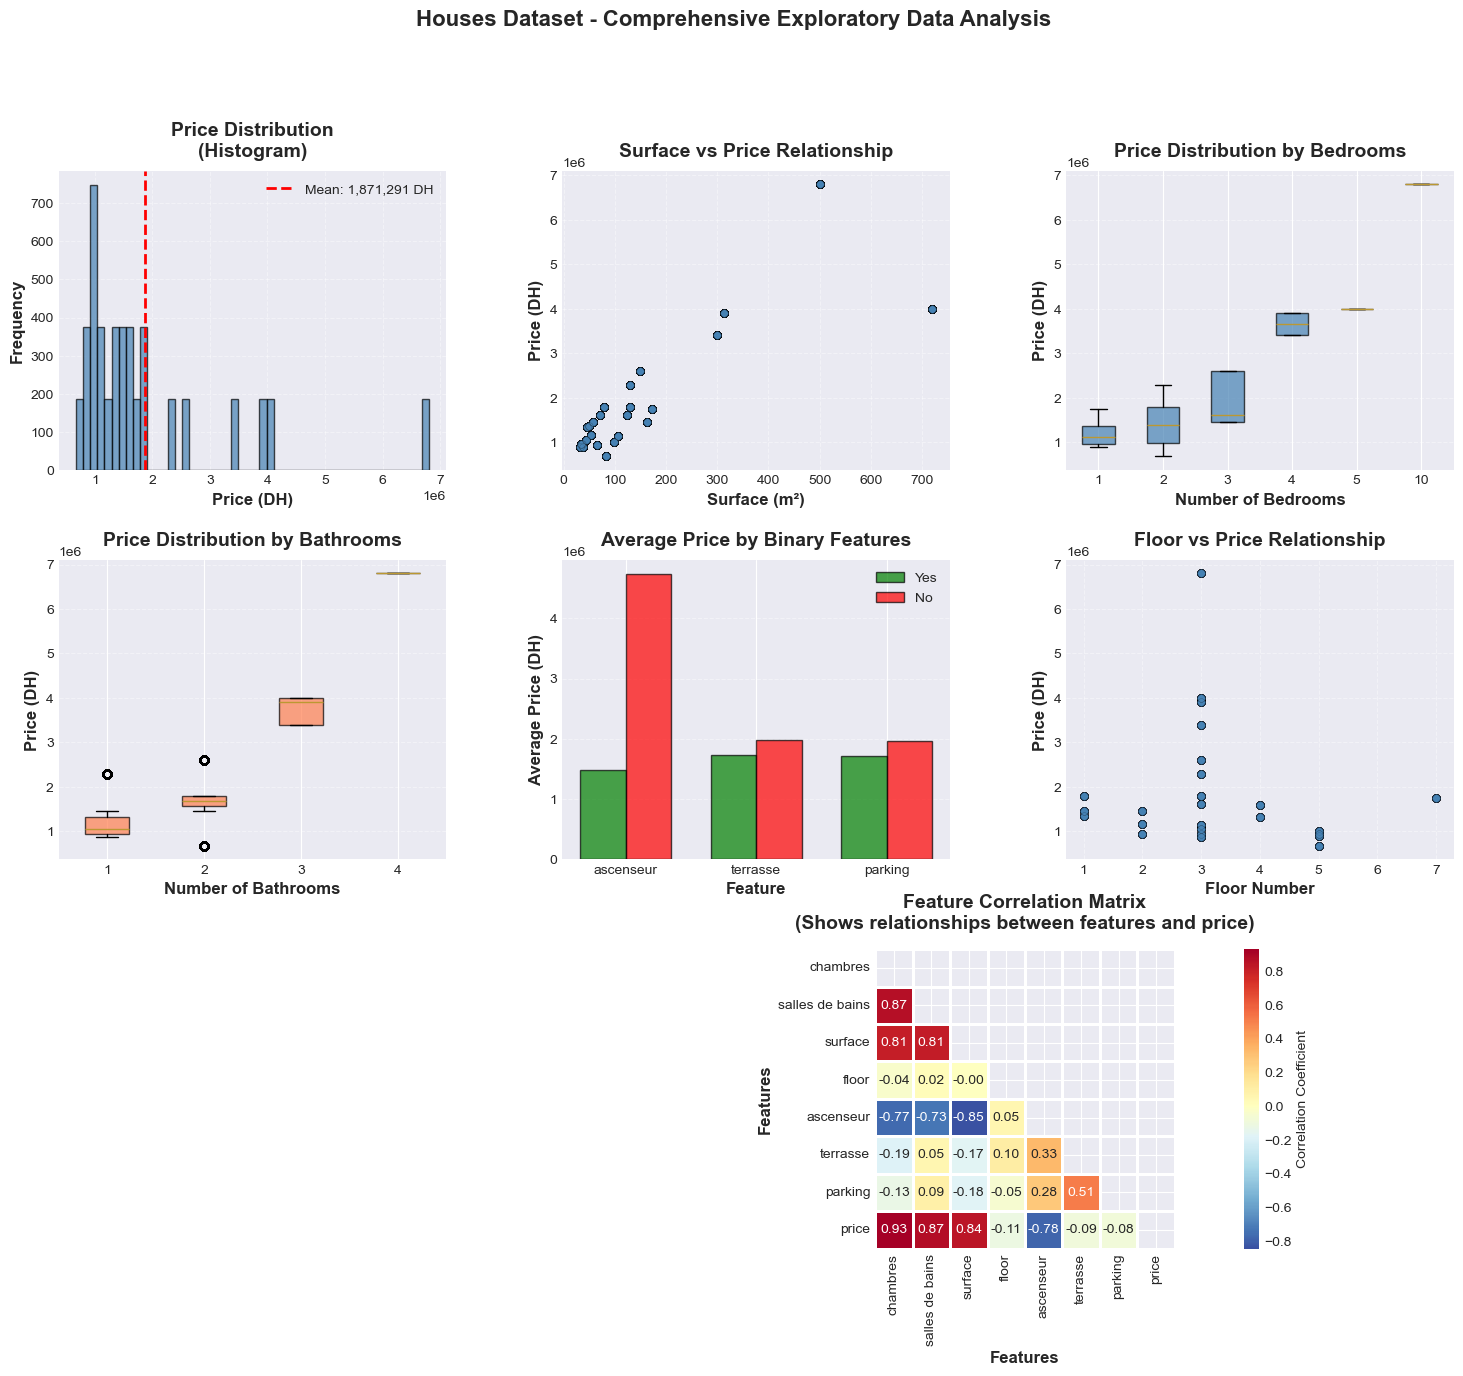


KEY INSIGHTS FROM VISUALIZATIONS:
  • Price distribution: Check if normally distributed or skewed
  • Surface vs Price: Should show positive correlation
  • Bedrooms/Bathrooms: More rooms generally increase price
  • Binary features: Show impact of amenities on price
  • Correlation matrix: Identify multicollinearity issues


In [12]:
# Comprehensive data visualization
fig = plt.figure(figsize=(18, 14))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Price Distribution (Histogram)
ax1 = fig.add_subplot(gs[0, 0])
n, bins, patches = ax1.hist(y, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
ax1.set_xlabel('Price (DH)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax1.set_title('Price Distribution\n(Histogram)', fontsize=14, fontweight='bold', pad=10)
ax1.grid(True, alpha=0.4, linestyle='--')
# Add mean line
mean_price = y.mean()
ax1.axvline(mean_price, color='red', linestyle='--', linewidth=2, 
            label=f'Mean: {mean_price:,.0f} DH')
ax1.legend(fontsize=10)

# 2. Surface vs Price (Scatter Plot)
ax2 = fig.add_subplot(gs[0, 1])
ax2.scatter(X_numeric['surface'], y, alpha=0.5, s=30, c='steelblue', edgecolors='black', linewidth=0.3)
ax2.set_xlabel('Surface (m²)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Price (DH)', fontsize=12, fontweight='bold')
ax2.set_title('Surface vs Price Relationship', fontsize=14, fontweight='bold', pad=10)
ax2.grid(True, alpha=0.4, linestyle='--')

# 3. Bedrooms vs Price (Box Plot)
ax3 = fig.add_subplot(gs[0, 2])
bedroom_counts = sorted(X_numeric['chambres'].unique())
box_data = [y[X_numeric['chambres']==i].ravel() for i in bedroom_counts]
bp = ax3.boxplot(box_data, labels=bedroom_counts, patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor('steelblue')
    patch.set_alpha(0.7)
ax3.set_xlabel('Number of Bedrooms', fontsize=12, fontweight='bold')
ax3.set_ylabel('Price (DH)', fontsize=12, fontweight='bold')
ax3.set_title('Price Distribution by Bedrooms', fontsize=14, fontweight='bold', pad=10)
ax3.grid(True, alpha=0.4, linestyle='--', axis='y')

# 4. Bathrooms vs Price
ax4 = fig.add_subplot(gs[1, 0])
bathroom_counts = sorted(X_numeric['salles de bains'].unique())
box_data_bath = [y[X_numeric['salles de bains']==i].ravel() for i in bathroom_counts]
bp4 = ax4.boxplot(box_data_bath, labels=bathroom_counts, patch_artist=True)
for patch in bp4['boxes']:
    patch.set_facecolor('coral')
    patch.set_alpha(0.7)
ax4.set_xlabel('Number of Bathrooms', fontsize=12, fontweight='bold')
ax4.set_ylabel('Price (DH)', fontsize=12, fontweight='bold')
ax4.set_title('Price Distribution by Bathrooms', fontsize=14, fontweight='bold', pad=10)
ax4.grid(True, alpha=0.4, linestyle='--', axis='y')

# 5. Feature Impact on Price (Binary features)
ax5 = fig.add_subplot(gs[1, 1])
binary_features = ['ascenseur', 'terrasse', 'parking']
binary_means = []
for feat in binary_features:
    yes_prices = y[X_numeric[feat]==1].ravel()
    no_prices = y[X_numeric[feat]==0].ravel()
    binary_means.append([yes_prices.mean(), no_prices.mean()])
binary_means = np.array(binary_means)
x_pos = np.arange(len(binary_features))
width = 0.35
ax5.bar(x_pos - width/2, binary_means[:, 0], width, label='Yes', 
        color='green', alpha=0.7, edgecolor='black')
ax5.bar(x_pos + width/2, binary_means[:, 1], width, label='No', 
        color='red', alpha=0.7, edgecolor='black')
ax5.set_xlabel('Feature', fontsize=12, fontweight='bold')
ax5.set_ylabel('Average Price (DH)', fontsize=12, fontweight='bold')
ax5.set_title('Average Price by Binary Features', fontsize=14, fontweight='bold', pad=10)
ax5.set_xticks(x_pos)
ax5.set_xticklabels(binary_features)
ax5.legend(fontsize=10)
ax5.grid(True, alpha=0.4, linestyle='--', axis='y')

# 6. Floor vs Price
ax6 = fig.add_subplot(gs[1, 2])
ax6.scatter(X_numeric['floor'], y, alpha=0.4, s=30, c='steelblue', edgecolors='black', linewidth=0.2)
ax6.set_xlabel('Floor Number', fontsize=12, fontweight='bold')
ax6.set_ylabel('Price (DH)', fontsize=12, fontweight='bold')
ax6.set_title('Floor vs Price Relationship', fontsize=14, fontweight='bold', pad=10)
ax6.grid(True, alpha=0.4, linestyle='--')

# 7-9. Correlation Heatmap (spans bottom row)
ax7 = fig.add_subplot(gs[2, :])
corr_data = X_numeric.copy()
corr_data['price'] = y.ravel()
correlation_matrix = corr_data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdYlBu_r', 
            center=0, ax=ax7, cbar_kws={'label': 'Correlation Coefficient'}, 
            square=True, linewidths=1, linecolor='white', annot_kws={'fontsize': 10})
ax7.set_title('Feature Correlation Matrix\n(Shows relationships between features and price)', 
              fontsize=14, fontweight='bold', pad=15)
ax7.set_xlabel('Features', fontsize=12, fontweight='bold')
ax7.set_ylabel('Features', fontsize=12, fontweight='bold')

plt.suptitle('Houses Dataset - Comprehensive Exploratory Data Analysis', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print(f"\n{'='*70}")
print("KEY INSIGHTS FROM VISUALIZATIONS:")
print(f"{'='*70}")
print("  • Price distribution: Check if normally distributed or skewed")
print("  • Surface vs Price: Should show positive correlation")
print("  • Bedrooms/Bathrooms: More rooms generally increase price")
print("  • Binary features: Show impact of amenities on price")
print("  • Correlation matrix: Identify multicollinearity issues")
print(f"{'='*70}")


In [13]:
# Convert to numpy arrays
X = X_numeric.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"\n{'='*70}")
print("TRAIN/TEST DATA SPLIT")
print(f"{'='*70}")
print(f"  • Total samples:        {len(X):,}")
print(f"  • Training samples:     {len(X_train):,} ({100*len(X_train)/len(X):.1f}%)")
print(f"  • Testing samples:      {len(X_test):,} ({100*len(X_test)/len(X):.1f}%)")
print(f"\n  • Training set:         X_train shape = {X_train.shape}, y_train shape = {y_train.shape}")
print(f"  • Testing set:          X_test shape = {X_test.shape}, y_test shape = {y_test.shape}")
print(f"\n  • Random state:         42 (for reproducibility)")
print(f"  • Shuffle:              True")
print(f"{'='*70}")



TRAIN/TEST DATA SPLIT
  • Total samples:        4,675
  • Training samples:     3,740 (80.0%)
  • Testing samples:      935 (20.0%)

  • Training set:         X_train shape = (3740, 7), y_train shape = (3740, 1)
  • Testing set:          X_test shape = (935, 7), y_test shape = (935, 1)

  • Random state:         42 (for reproducibility)
  • Shuffle:              True


### 10.1: Linear Regression using Normal Equation


In [14]:
# Scale features for better numerical stability
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n{'='*70}")
print("FEATURE SCALING")
print(f"{'='*70}")
print("  • Applied StandardScaler: (x - mean) / std")
print("  • Features are now centered around 0 with unit variance")
print("  • This improves numerical stability for matrix operations")
print(f"{'='*70}")

# Add bias term
X_train_b = add_dummy_feature(X_train_scaled)
X_test_b = add_dummy_feature(X_test_scaled)

# Compute theta using Normal Equation
print(f"\n{'='*70}")
print("TRAINING LINEAR REGRESSION USING NORMAL EQUATION")
print(f"{'='*70}")
print("  Formula: θ̂ = (XᵀX)⁻¹ Xᵀy")
print(f"{'='*70}")

theta_normal = np.linalg.inv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train

print(f"\n{'─'*70}")
print("Model Parameters (θ):")
print(f"{'─'*70}")
print(f"  Bias term (θ₀):     {theta_normal[0][0]:>15,.2f} DH")
print(f"\n  Feature Coefficients:")
for i, feature_name in enumerate(X_numeric.columns):
    sign = "+" if theta_normal[i+1][0] >= 0 else ""
    print(f"    θ{i+1:2d} ({feature_name:20s}): {sign}{theta_normal[i+1][0]:>12,.2f} DH/unit")

# Make predictions
y_train_pred_normal = X_train_b @ theta_normal
y_test_pred_normal = X_test_b @ theta_normal

# Calculate metrics
train_mse_normal = mean_squared_error(y_train, y_train_pred_normal)
test_mse_normal = mean_squared_error(y_test, y_test_pred_normal)
train_rmse_normal = np.sqrt(train_mse_normal)
test_rmse_normal = np.sqrt(test_mse_normal)
train_r2_normal = r2_score(y_train, y_train_pred_normal)
test_r2_normal = r2_score(y_test, y_test_pred_normal)

print(f"\n{'─'*70}")
print("Normal Equation Performance Metrics:")
print(f"{'─'*70}")
print(f"  TRAINING SET:")
print(f"    • MSE:   {train_mse_normal:>15,.2f}")
print(f"    • RMSE:  {train_rmse_normal:>15,.2f} DH")
print(f"    • R²:    {train_r2_normal:>15.4f} ({train_r2_normal*100:.2f}% variance explained)")
print(f"\n  TEST SET:")
print(f"    • MSE:   {test_mse_normal:>15,.2f}")
print(f"    • RMSE:  {test_rmse_normal:>15,.2f} DH")
print(f"    • R²:    {test_r2_normal:>15.4f} ({test_r2_normal*100:.2f}% variance explained)")
print(f"{'='*70}")



FEATURE SCALING
  • Applied StandardScaler: (x - mean) / std
  • Features are now centered around 0 with unit variance
  • This improves numerical stability for matrix operations

TRAINING LINEAR REGRESSION USING NORMAL EQUATION
  Formula: θ̂ = (XᵀX)⁻¹ Xᵀy

──────────────────────────────────────────────────────────────────────
Model Parameters (θ):
──────────────────────────────────────────────────────────────────────
  Bias term (θ₀):        1,863,587.73 DH

  Feature Coefficients:
    θ 1 (chambres            ): +  875,725.55 DH/unit
    θ 2 (salles de bains     ): +  121,425.71 DH/unit
    θ 3 (surface             ): +  257,402.50 DH/unit
    θ 4 (floor               ):  -129,877.08 DH/unit
    θ 5 (ascenseur           ):  -104,702.55 DH/unit
    θ 6 (terrasse            ): +  138,774.27 DH/unit
    θ 7 (parking             ):   -14,911.76 DH/unit

──────────────────────────────────────────────────────────────────────
Normal Equation Performance Metrics:
───────────────────────────

### 10.2: Linear Regression using Scikit-Learn


In [15]:
# Train using Scikit-Learn
print(f"\n{'='*70}")
print("TRAINING LINEAR REGRESSION USING SCIKIT-LEARN")
print(f"{'='*70}")
print("  • Uses SVD (Singular Value Decomposition) internally")
print("  • More numerically stable than Normal Equation")
print("  • Automatically handles edge cases")
print(f"{'='*70}")

lin_reg_house = LinearRegression()
lin_reg_house.fit(X_train_scaled, y_train)

print(f"\n{'─'*70}")
print("Scikit-Learn Model Parameters:")
print(f"{'─'*70}")
print(f"  Intercept (θ₀):     {lin_reg_house.intercept_[0]:>15,.2f} DH")
print(f"\n  Feature Coefficients:")
for i, feature_name in enumerate(X_numeric.columns):
    sign = "+" if lin_reg_house.coef_[0][i] >= 0 else ""
    print(f"    θ{i+1:2d} ({feature_name:20s}): {sign}{lin_reg_house.coef_[0][i]:>12,.2f} DH/unit")

# Make predictions
y_train_pred_sklearn = lin_reg_house.predict(X_train_scaled)
y_test_pred_sklearn = lin_reg_house.predict(X_test_scaled)

# Calculate metrics
train_mse_sklearn = mean_squared_error(y_train, y_train_pred_sklearn)
test_mse_sklearn = mean_squared_error(y_test, y_test_pred_sklearn)
train_rmse_sklearn = np.sqrt(train_mse_sklearn)
test_rmse_sklearn = np.sqrt(test_mse_sklearn)
train_r2_sklearn = r2_score(y_train, y_train_pred_sklearn)
test_r2_sklearn = r2_score(y_test, y_test_pred_sklearn)

print(f"\n{'─'*70}")
print("Scikit-Learn Performance Metrics:")
print(f"{'─'*70}")
print(f"  TRAINING SET:")
print(f"    • MSE:   {train_mse_sklearn:>15,.2f}")
print(f"    • RMSE:  {train_rmse_sklearn:>15,.2f} DH")
print(f"    • R²:    {train_r2_sklearn:>15.4f} ({train_r2_sklearn*100:.2f}% variance explained)")
print(f"\n  TEST SET:")
print(f"    • MSE:   {test_mse_sklearn:>15,.2f}")
print(f"    • RMSE:  {test_rmse_sklearn:>15,.2f} DH")
print(f"    • R²:    {test_r2_sklearn:>15.4f} ({test_r2_sklearn*100:.2f}% variance explained)")

# Compare with Normal Equation
print(f"\n{'─'*70}")
print("Comparison (Normal Equation vs Scikit-Learn):")
print(f"{'─'*70}")
intercept_diff = abs(theta_normal[0][0] - lin_reg_house.intercept_[0])
coef_diff = np.abs(theta_normal[1:] - lin_reg_house.coef_.T).max()
print(f"  • Intercept difference:     {intercept_diff:.10f} DH")
print(f"  • Max coefficient diff:     {coef_diff:.10f} DH/unit")
print(f"  ✓ Results are virtually identical (within numerical precision)")
print(f"{'='*70}")



TRAINING LINEAR REGRESSION USING SCIKIT-LEARN
  • Uses SVD (Singular Value Decomposition) internally
  • More numerically stable than Normal Equation
  • Automatically handles edge cases

──────────────────────────────────────────────────────────────────────
Scikit-Learn Model Parameters:
──────────────────────────────────────────────────────────────────────
  Intercept (θ₀):        1,863,587.73 DH

  Feature Coefficients:
    θ 1 (chambres            ): +  875,725.55 DH/unit
    θ 2 (salles de bains     ): +  121,425.71 DH/unit
    θ 3 (surface             ): +  257,402.50 DH/unit
    θ 4 (floor               ):  -129,877.08 DH/unit
    θ 5 (ascenseur           ):  -104,702.55 DH/unit
    θ 6 (terrasse            ): +  138,774.27 DH/unit
    θ 7 (parking             ):   -14,911.76 DH/unit

──────────────────────────────────────────────────────────────────────
Scikit-Learn Performance Metrics:
──────────────────────────────────────────────────────────────────────
  TRAINING SET:
    

### 10.3: Visualization of Results



VISUALIZING MODEL PERFORMANCE


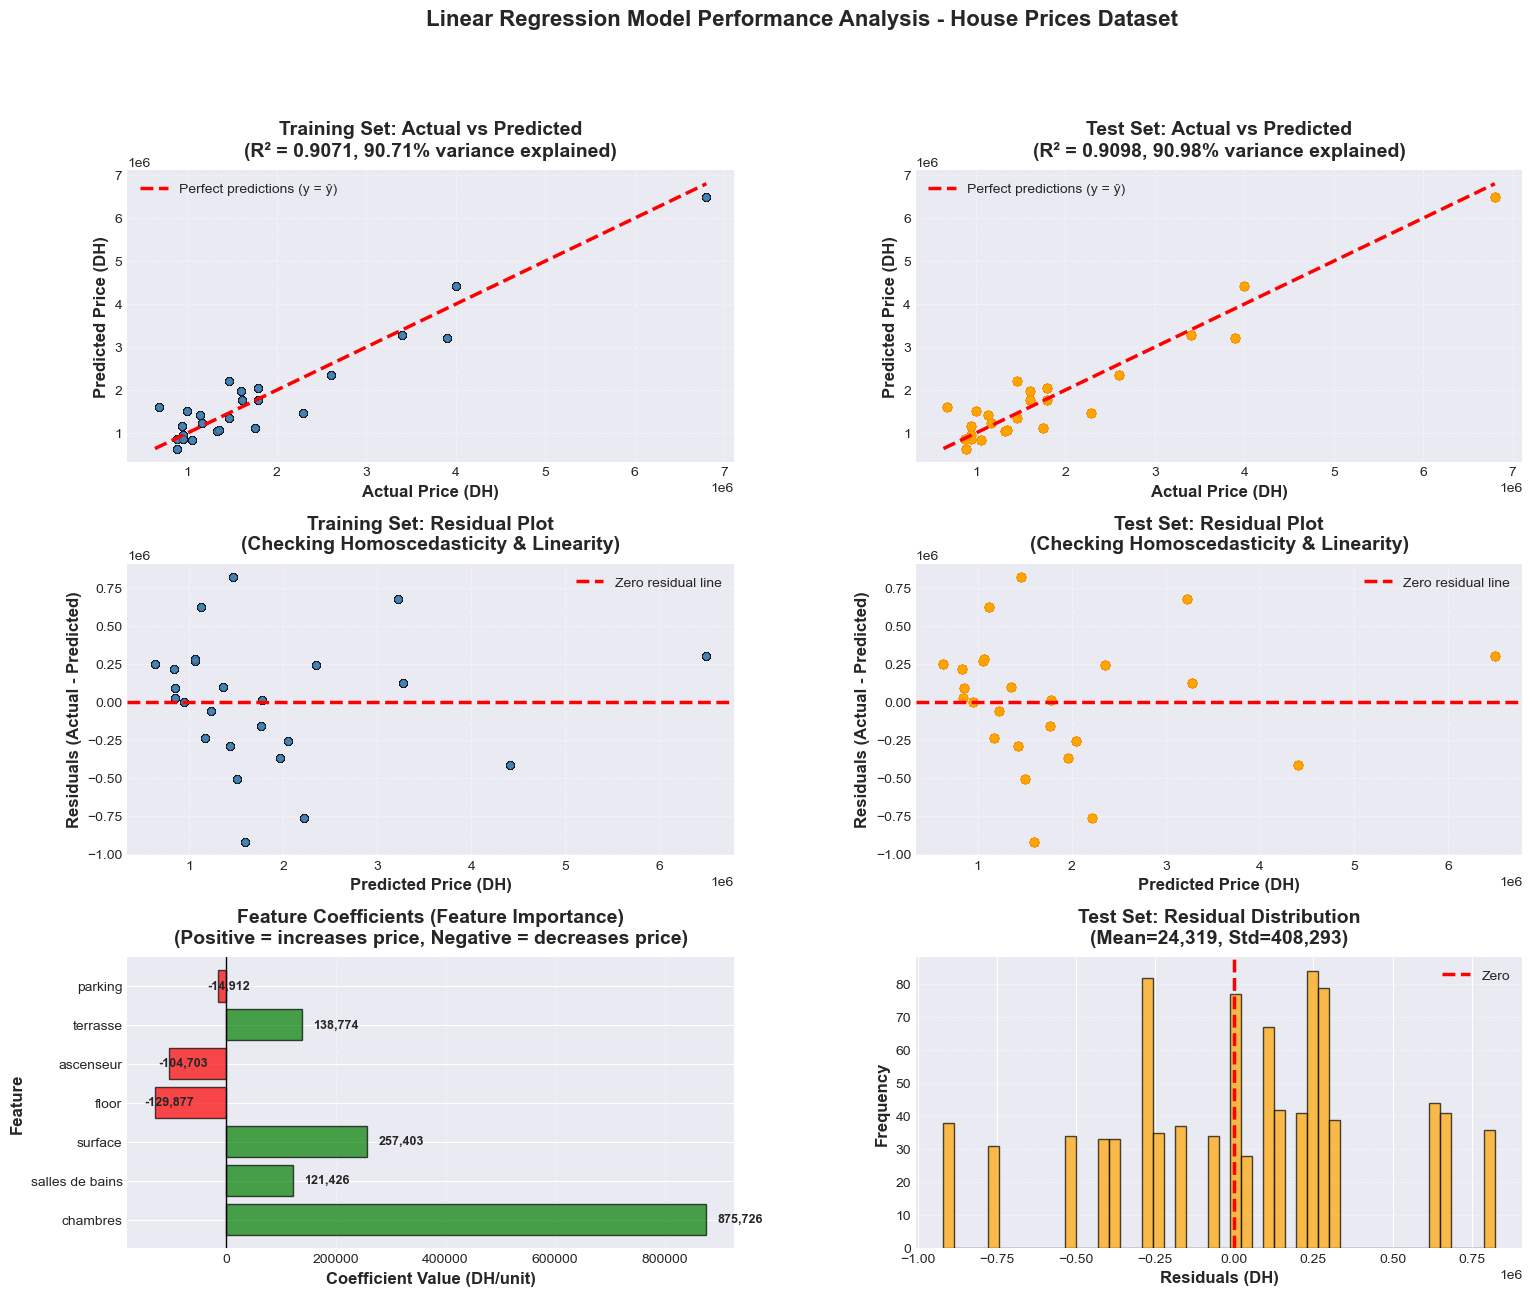


INTERPRETATION GUIDE:
  • Actual vs Predicted: Points close to diagonal = good predictions
  • Residual Plots: Random scatter around zero = good model assumptions
  • Feature Coefficients: Magnitude shows feature importance
  • Residual Distribution: Should be normally distributed around zero


In [16]:
# Comprehensive visualization of results
print(f"\n{'='*70}")
print("VISUALIZING MODEL PERFORMANCE")
print(f"{'='*70}")

# Create comprehensive figure
fig = plt.figure(figsize=(18, 14))
gs = fig.add_gridspec(3, 2, hspace=0.35, wspace=0.3)

# 1. Training set: Actual vs Predicted
ax1 = fig.add_subplot(gs[0, 0])
ax1.scatter(y_train, y_train_pred_sklearn, alpha=0.5, s=30, c='steelblue', 
            edgecolors='black', linewidth=0.3)
min_train = min(y_train.min(), y_train_pred_sklearn.min())
max_train = max(y_train.max(), y_train_pred_sklearn.max())
ax1.plot([min_train, max_train], [min_train, max_train], 
         'r--', linewidth=2.5, label='Perfect predictions (y = ŷ)')
ax1.set_xlabel('Actual Price (DH)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Predicted Price (DH)', fontsize=12, fontweight='bold')
ax1.set_title(f'Training Set: Actual vs Predicted\n(R² = {train_r2_sklearn:.4f}, {train_r2_sklearn*100:.2f}% variance explained)', 
              fontsize=14, fontweight='bold', pad=10)
ax1.legend(fontsize=10, loc='best')
ax1.grid(True, alpha=0.4, linestyle='--')

# 2. Test set: Actual vs Predicted
ax2 = fig.add_subplot(gs[0, 1])
ax2.scatter(y_test, y_test_pred_sklearn, alpha=0.6, s=40, c='orange', 
            edgecolors='darkorange', linewidth=0.3)
min_test = min(y_test.min(), y_test_pred_sklearn.min())
max_test = max(y_test.max(), y_test_pred_sklearn.max())
ax2.plot([min_test, max_test], [min_test, max_test], 
         'r--', linewidth=2.5, label='Perfect predictions (y = ŷ)')
ax2.set_xlabel('Actual Price (DH)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Predicted Price (DH)', fontsize=12, fontweight='bold')
ax2.set_title(f'Test Set: Actual vs Predicted\n(R² = {test_r2_sklearn:.4f}, {test_r2_sklearn*100:.2f}% variance explained)', 
              fontsize=14, fontweight='bold', pad=10)
ax2.legend(fontsize=10, loc='best')
ax2.grid(True, alpha=0.4, linestyle='--')

# 3. Residuals plot (training)
residuals_train = y_train.ravel() - y_train_pred_sklearn.ravel()
ax3 = fig.add_subplot(gs[1, 0])
ax3.scatter(y_train_pred_sklearn, residuals_train, alpha=0.5, s=30, c='steelblue', 
            edgecolors='black', linewidth=0.3)
ax3.axhline(y=0, color='red', linestyle='--', linewidth=2.5, label='Zero residual line')
ax3.set_xlabel('Predicted Price (DH)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Residuals (Actual - Predicted)', fontsize=12, fontweight='bold')
ax3.set_title(f'Training Set: Residual Plot\n(Checking Homoscedasticity & Linearity)', 
              fontsize=14, fontweight='bold', pad=10)
ax3.legend(fontsize=10, loc='best')
ax3.grid(True, alpha=0.4, linestyle='--')

# 4. Residuals plot (test)
residuals_test = y_test.ravel() - y_test_pred_sklearn.ravel()
ax4 = fig.add_subplot(gs[1, 1])
ax4.scatter(y_test_pred_sklearn, residuals_test, alpha=0.6, s=40, c='orange', 
            edgecolors='darkorange', linewidth=0.3)
ax4.axhline(y=0, color='red', linestyle='--', linewidth=2.5, label='Zero residual line')
ax4.set_xlabel('Predicted Price (DH)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Residuals (Actual - Predicted)', fontsize=12, fontweight='bold')
ax4.set_title(f'Test Set: Residual Plot\n(Checking Homoscedasticity & Linearity)', 
              fontsize=14, fontweight='bold', pad=10)
ax4.legend(fontsize=10, loc='best')
ax4.grid(True, alpha=0.4, linestyle='--')

# 5. Feature importance (coefficients) - horizontal bar
ax5 = fig.add_subplot(gs[2, 0])
feature_names = X_numeric.columns
coefficients = lin_reg_house.coef_[0]
colors = ['green' if x > 0 else 'red' for x in coefficients]
bars = ax5.barh(feature_names, coefficients, color=colors, alpha=0.7, edgecolor='black', linewidth=1)
ax5.set_xlabel('Coefficient Value (DH/unit)', fontsize=12, fontweight='bold')
ax5.set_ylabel('Feature', fontsize=12, fontweight='bold')
ax5.set_title('Feature Coefficients (Feature Importance)\n(Positive = increases price, Negative = decreases price)', 
              fontsize=14, fontweight='bold', pad=10)
ax5.axvline(x=0, color='black', linestyle='-', linewidth=1)
ax5.grid(True, alpha=0.4, linestyle='--', axis='x')
# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars, coefficients)):
    ax5.text(val + (max(coefficients) - min(coefficients)) * 0.02 if val >= 0 
             else val - (max(coefficients) - min(coefficients)) * 0.02, 
             i, f'{val:,.0f}', va='center', fontsize=9, fontweight='bold')

# 6. Residual Distribution (Histogram)
ax6 = fig.add_subplot(gs[2, 1])
ax6.hist(residuals_test, bins=50, edgecolor='black', alpha=0.7, color='orange')
ax6.axvline(x=0, color='red', linestyle='--', linewidth=2.5, label='Zero')
ax6.set_xlabel('Residuals (DH)', fontsize=12, fontweight='bold')
ax6.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax6.set_title(f'Test Set: Residual Distribution\n(Mean={residuals_test.mean():,.0f}, Std={residuals_test.std():,.0f})', 
              fontsize=14, fontweight='bold', pad=10)
ax6.legend(fontsize=10)
ax6.grid(True, alpha=0.4, linestyle='--', axis='y')

plt.suptitle('Linear Regression Model Performance Analysis - House Prices Dataset', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print(f"\n{'='*70}")
print("INTERPRETATION GUIDE:")
print(f"{'='*70}")
print("  • Actual vs Predicted: Points close to diagonal = good predictions")
print("  • Residual Plots: Random scatter around zero = good model assumptions")
print("  • Feature Coefficients: Magnitude shows feature importance")
print("  • Residual Distribution: Should be normally distributed around zero")
print(f"{'='*70}")


### 10.4: Complete Pipeline Function

Here's a reusable function that encapsulates the complete linear regression pipeline.


In [17]:
def linear_regression_pipeline(X, y, test_size=0.2, random_state=42, scale_features=True):
    """
    Complete linear regression pipeline with train/test split
    and performance evaluation.
    
    Parameters:
    -----------
    X : array-like, shape (n_samples, n_features)
        Feature matrix
    y : array-like, shape (n_samples, 1)
        Target vector
    test_size : float, default=0.2
        Proportion of dataset to include in the test split
    random_state : int, default=42
        Random seed for reproducibility
    scale_features : bool, default=True
        Whether to scale features using StandardScaler
    
    Returns:
    --------
    model : LinearRegression
        Trained linear regression model
    scaler : StandardScaler or None
        Fitted scaler (if scale_features=True)
    results : dict
        Dictionary containing performance metrics
    """
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error, r2_score
    
    # 1. Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    # 2. Scale features (optional but recommended)
    scaler = None
    if scale_features:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test
    
    # 3. Train model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    
    # 4. Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # 5. Evaluate
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    results = {
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_r2': train_r2,
        'test_r2': test_r2
    }
    
    return model, scaler, results

# Example usage
print(f"\n{'='*70}")
print("COMPLETE PIPELINE EXAMPLE - REUSABLE FUNCTION")
print(f"{'='*70}")
print("  This function encapsulates the entire linear regression workflow:")
print("    1. Train/test split")
print("    2. Feature scaling (optional)")
print("    3. Model training")
print("    4. Performance evaluation")
print(f"{'='*70}")

model_final, scaler_final, results_final = linear_regression_pipeline(
    X, y, test_size=0.2, random_state=42, scale_features=True
)

print(f"\n{'─'*70}")
print("Pipeline Results:")
print(f"{'─'*70}")
print(f"  TRAINING SET METRICS:")
print(f"    • MSE:   {results_final['train_mse']:>15,.2f}")
print(f"    • RMSE:  {results_final['train_rmse']:>15,.2f} DH")
print(f"    • R²:    {results_final['train_r2']:>15.4f} ({results_final['train_r2']*100:.2f}% variance explained)")
print(f"\n  TEST SET METRICS:")
print(f"    • MSE:   {results_final['test_mse']:>15,.2f}")
print(f"    • RMSE:  {results_final['test_rmse']:>15,.2f} DH")
print(f"    • R²:    {results_final['test_r2']:>15.4f} ({results_final['test_r2']*100:.2f}% variance explained)")

print(f"\n{'─'*70}")
print("Model Parameters:")
print(f"{'─'*70}")
print(f"  Intercept (θ₀):     {model_final.intercept_[0]:>15,.2f} DH")
print(f"\n  Feature Coefficients:")
for i, feature_name in enumerate(X_numeric.columns):
    sign = "+" if model_final.coef_[0][i] >= 0 else ""
    print(f"    θ{i+1:2d} ({feature_name:20s}): {sign}{model_final.coef_[0][i]:>12,.2f} DH/unit")
print(f"{'='*70}")
print("\n✓ Pipeline executed successfully!")
print(f"{'='*70}")



COMPLETE PIPELINE EXAMPLE - REUSABLE FUNCTION
  This function encapsulates the entire linear regression workflow:
    1. Train/test split
    2. Feature scaling (optional)
    3. Model training
    4. Performance evaluation

──────────────────────────────────────────────────────────────────────
Pipeline Results:
──────────────────────────────────────────────────────────────────────
  TRAINING SET METRICS:
    • MSE:   168,061,474,785.30
    • RMSE:       409,953.02 DH
    • R²:             0.9071 (90.71% variance explained)

  TEST SET METRICS:
    • MSE:   167,294,698,304.92
    • RMSE:       409,016.75 DH
    • R²:             0.9098 (90.98% variance explained)

──────────────────────────────────────────────────────────────────────
Model Parameters:
──────────────────────────────────────────────────────────────────────
  Intercept (θ₀):        1,863,587.73 DH

  Feature Coefficients:
    θ 1 (chambres            ): +  875,725.55 DH/unit
    θ 2 (salles de bains     ): +  121,425.71 

## Summary and Key Takeaways

### **Key Concepts:**

1. **Normal Equation**: Direct mathematical solution, O(n²) to O(n³) complexity
   - θ̂ = (XᵀX)⁻¹ Xᵀy
   - Works well for small to medium datasets
   - Can fail with singular matrices or multicollinearity

2. **SVD/Pseudoinverse**: More numerically stable, handles edge cases
   - Uses Singular Value Decomposition
   - Always defined (unlike Normal Equation)
   - Used internally by Scikit-Learn

3. **Scikit-Learn**: Preferred for production use
   - Handles scaling and edge cases automatically
   - Optimized implementation
   - Easy to use API

### **Performance Metrics:**

- **MSE (Mean Squared Error)**: Average of squared errors
- **RMSE (Root Mean Squared Error)**: Square root of MSE, in same units as target
- **R² Score**: Coefficient of determination
  - R² = 1.0: Perfect predictions
  - R² = 0.0: Model predicts the mean
  - R² < 0.0: Model is worse than predicting the mean

### **Computational Complexity:**

- **Training**: O(n²) to O(n³) depending on method, O(m) with respect to instances
- **Prediction**: O(n) per instance

### **When to Use Each Method:**

- **Normal Equation**: Small datasets (n < 1000), educational purposes
- **Scikit-Learn**: Production use, large datasets, automatic handling of edge cases
- **Manual SVD**: When you need more control over numerical stability

### **Best Practices:**

1. Always split data into training and testing sets
2. Scale features for better numerical stability
3. Evaluate on test set to check for overfitting
4. Visualize residuals to check model assumptions
5. Check for multicollinearity in features
6. Use R² and RMSE together for comprehensive evaluation
